In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pyplanemono_minimal.elements import *
%matplotlib widget

2400 1 600 2 5.166008268050012e-10


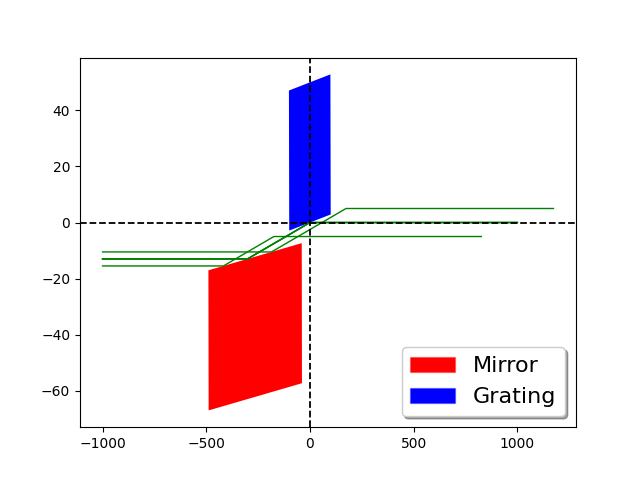

In [96]:
pgm = PGM(mirror=Plane_Mirror(), grating = Grating())
pgm.set_theta()
mirror_corners = pgm.mirror.compute_corners()
grating_corners = pgm.grating.compute_corners()
fig, ax = plt.subplots()
pgm.draw_sideview(ax)


In [70]:
mirror_corners

array([[ -35.        ,   -7.35938844,  -39.71041869],
       [  35.        ,   -7.35938844,  -39.71041869],
       [ -35.        ,  -57.34776597,  -38.63240584],
       [  35.        ,  -57.34776597,  -38.63240584],
       [ -35.        ,  -17.06150405, -489.60581648],
       [  35.        ,  -17.06150405, -489.60581648],
       [ -35.        ,  -67.04988158, -488.52780363],
       [  35.        ,  -67.04988158, -488.52780363]])

In [71]:
grating_corners

array([[ -20.        ,   -2.87462665,  -99.95867407],
       [  20.        ,   -2.87462665,  -99.95867407],
       [ -20.        ,    2.87462665,   99.95867407],
       [  20.        ,    2.87462665,   99.95867407],
       [ -20.        ,   47.10471038, -101.3959874 ],
       [  20.        ,   47.10471038, -101.3959874 ],
       [ -20.        ,   52.85396369,   98.52136074],
       [  20.        ,   52.85396369,   98.52136074]])

In [48]:
mirror_z = np.array(
    [mirror_corners[i][2] for i in [4,6,2,0,4]]
)
mirror_x = np.array(
    [mirror_corners[i][1] for i in [4,6,2,0,4]]
)

grating_z = np.array(
    [grating_corners[i][2] for i in [4,6,2,0,4]]
)
grating_x = np.array(
    [grating_corners[i][1] for i in [4,6,2,0,4]]
)

In [120]:
ray1z = [pgm.rays[0].position.list[2],
         pgm.mirror_intercept[0].z,
         pgm.grating_intercept[0].z,
         1000]

ray1x = [pgm.rays[0].position.list[1],
         pgm.mirror_intercept[0].y,
         pgm.grating_intercept[0].y,
         0]
ray2z = [pgm.rays[1].position.list[2],
         pgm.mirror_intercept[1].z,
         pgm.grating_intercept[1].z,
         1000]

ray2x = [pgm.rays[1].position.list[1],
         pgm.mirror_intercept[1].y,
         pgm.grating_intercept[1].y,
         pgm.grating_intercept[1].y + 1000*pgm.rays[1].vector[1]]

ray3z = [pgm.rays[2].position.list[2],
         pgm.mirror_intercept[2].z,
         pgm.grating_intercept[2].z,
         1000]

ray3x = [pgm.rays[2].position.list[1],
         pgm.mirror_intercept[2].y,
         pgm.grating_intercept[2].y,
         pgm.grating_intercept[2].y + 1000*pgm.rays[2].vector[1]]

In [84]:
pgm.mirror_intercept[0].x

0.0

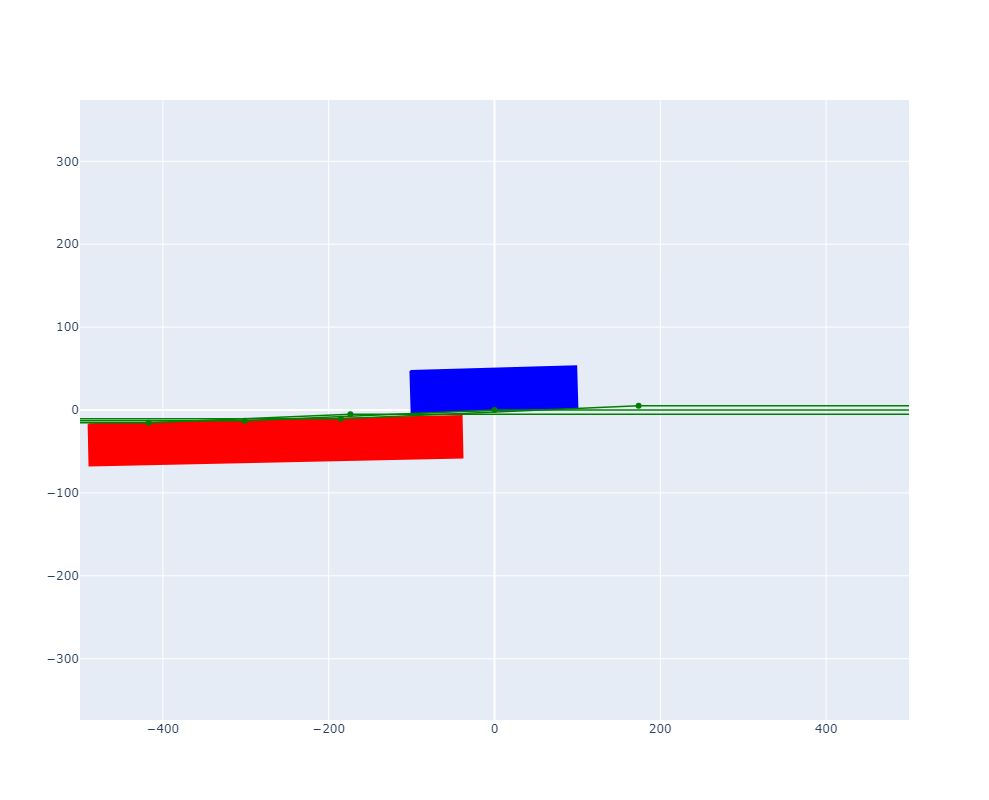

In [123]:
fig = go.Figure(layout={'showlegend':False, 'xaxis':{'range':(-500,500),}, 'height':800, 'yaxis':{'range':(-50,50)}})
fig.add_trace(go.Scatter(x=mirror_z, y=mirror_x,fill='toself', mode='lines',fillcolor='red',line={"color":'red'}, marker={'size':0}, name='Mirror'))
fig.add_trace(go.Scatter(x=grating_z, y=grating_x,fill='toself',  mode='lines',fillcolor='blue',line={"color":'blue'}, marker={'size':0}, name='Grating'))
fig.update_xaxes(
   scaleanchor="y",
    scaleratio=1,)

fig.add_trace(go.Scatter(x=ray1z, y = ray1x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray2z, y = ray2x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray3z, y = ray3x, line={'color':'green', 'width':1.5}))


